# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [2]:
# Importing API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Outputing file (csv)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Listing for holding lat_lngs and cities
lat_lngs = []
cities = []

# Creating a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identifying nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# cities = ["tilichiki", "london"]
# Printing the city count to confirm sufficient count
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
query_url = f'{url}appid={api_key}&units={units}&q='

In [5]:
i = 1
data = []
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing city #{i}: {city}")
        data.append({
            'longitude': response['coord']['lon'], 
            'latitude': response['coord']['lat'],
            'temperature': response['main']['temp'],
            'humidity': response['main']['humidity'],
            'cloudiness': response['clouds']['all'],
            'wind speed': response['wind']['speed'],
            'city': response['name'],
            'country': response['sys']['country'],
            'date': response['dt']
        })
        i += 1

Processing city #1: saskylakh
Processing city #2: sibolga
Processing city #3: port alfred
Processing city #4: ugoofaaru
Processing city #5: eureka
Processing city #6: kaitangata
Processing city #7: makaleng
Processing city #8: jamestown
Processing city #9: saint anthony
Processing city #10: mataura
Processing city #11: butaritari
Processing city #12: maragogi
Processing city #13: puerto ayora
Processing city #14: vaini
Processing city #15: aljezur
Processing city #16: ushuaia
Processing city #17: brookhaven
Processing city #18: keti bandar
Processing city #19: luderitz
Processing city #20: cururupu
Processing city #21: barra do garcas
Processing city #22: umea
Processing city #23: pevek
Processing city #24: tucuman
Processing city #25: busselton
Processing city #26: lebu
Processing city #27: abong mbang
Processing city #28: alpena
Processing city #29: albany
Processing city #30: negombo
Processing city #31: frankfort
Processing city #32: tasiilaq
Processing city #33: jizan
Processing c

Processing city #266: shimoda
Processing city #267: caledon
Processing city #268: yessentukskaya
Processing city #269: morden
Processing city #270: severo-kurilsk
Processing city #271: topolobampo
Processing city #272: mabaruma
Processing city #273: hithadhoo
Processing city #274: itoman
Processing city #275: pontes e lacerda
Processing city #276: srednekolymsk
Processing city #277: fukue
Processing city #278: santa rosa
Processing city #279: gao
Processing city #280: rio grande
Processing city #281: solok
Processing city #282: qui nhon
Processing city #283: ankazoabo
Processing city #284: ayan
Processing city #285: rio gallegos
Processing city #286: san patricio
Processing city #287: caravelas
Processing city #288: kedrovyy
Processing city #289: bilibino
Processing city #290: fort nelson
Processing city #291: teguldet
Processing city #292: ambulu
Processing city #293: san julian
Processing city #294: lethem
Processing city #295: katsuura
Processing city #296: kahului
Processing city #

Processing city #527: roma
Processing city #528: maningrida
Processing city #529: noumea
Processing city #530: zafarwal
Processing city #531: nioro
Processing city #532: creel
Processing city #533: alenquer
Processing city #534: nyuksenitsa
Processing city #535: altamont
Processing city #536: onokhoy
Processing city #537: ponnani
Processing city #538: biltine
Processing city #539: rapid city
Processing city #540: joshimath
Processing city #541: jalu
Processing city #542: prudentopolis
Processing city #543: sept-iles
Processing city #544: tessalit
Processing city #545: kalengwa
Processing city #546: sao paulo de olivenca
Processing city #547: halifax
Processing city #548: pimenta bueno
Processing city #549: epe
Processing city #550: sindou
Processing city #551: talnakh
Processing city #552: asosa
Processing city #553: yamada
Processing city #554: borivka
Processing city #555: conde
Processing city #556: rosamorada
Processing city #557: balikpapan
Processing city #558: ancud
Processing c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# DataFrame
df = pd.DataFrame(data)
df.to_csv('test.csv', index = False)
df.dtypes

city            object
cloudiness       int64
country         object
date             int64
humidity         int64
latitude       float64
longitude      float64
temperature    float64
wind speed     float64
dtype: object

In [7]:
df.head()

,city,cloudiness,country,date,humidity,latitude,longitude,temperature,wind speed
0,Saskylakh,32,RU,1586758046,90,71.92,114.08,-14.37,4.96
1,Sibolga,72,ID,1586758637,69,1.74,98.78,30.15,2.46
2,Port Alfred,7,ZA,1586758646,72,-33.59,26.89,17.22,0.89
3,Ugoofaaru,95,MV,1586758646,69,5.67,73.00,29.95,4.78
4,Eureka,1,US,1586758576,87,40.80,-124.16,7.44,2.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

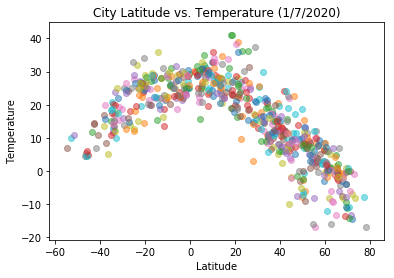

In [8]:
# Plotting
for dat in data:
    x = dat['latitude']
    y = dat['temperature']
    plt.scatter(x, y, alpha = 0.5)
plt.title('City Latitude vs. Temperature (1/7/2020)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('images/Figure1LatitudeTemperature.png')
plt.show()

#### Latitude vs. Humidity Plot

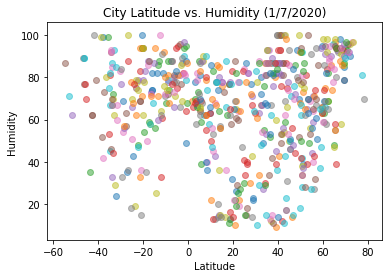

In [9]:
# Plotting
for dat in data:
    x = dat['latitude']
    y = dat['humidity']
    plt.scatter(x, y, alpha = 0.5)
plt.title('City Latitude vs. Humidity (1/7/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('images/Figure2LatitudeHumidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

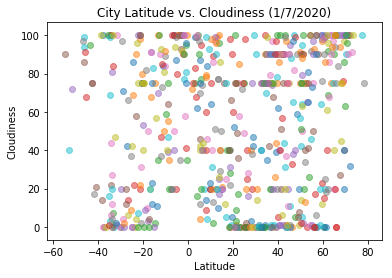

In [10]:
# Plotting
for dat in data:
    x = dat['latitude']
    y = dat['cloudiness']
    plt.scatter(x, y, alpha = 0.5)
plt.title('City Latitude vs. Cloudiness (1/7/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('images/Figure3LatitudeCloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

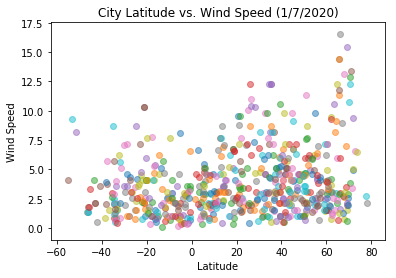

In [11]:
# Plotting
for dat in data:
    x = dat['latitude']
    y = dat['wind speed']
    plt.scatter(x, y, alpha = 0.5)
plt.title('City Latitude vs. Wind Speed (1/7/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('images/Figure4LatitudeWindSpeed.png')
plt.show()

In [12]:
# Observation 1: Figure 1 shows a significant decrease as latitude increases.
# Observation 2: Figure 2 and Figure 4 show opposite correlations between humidity vs. latitude and wind speed vs. latitude.
# Observation 3: Figure 3 shows that there is no correlation between cloudiness and latitude.